1. Make seeping function work with intervals startinf in a  number $\neq 0$ $\checkmark$.
2. Make that function work for $n=0$, combining it with Pul $\checkmark$.
3. Modify then that funciton to act on the pulse list given the condition of Sweep time.  $\checkmark$.
4. Search and correct the bugs.
5. Implement Sweeping with Duration. $\checkmark$
6. Calculate the number of points given by the sweeping rite and total time  $N=$ sweeping rate $* T$

In [1]:
%matplotlib inline 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Pulses

In [25]:
Rabi={
    'Amplitude':10,
    'Start time':1e-10,
    'End time':2e-10,
    'Start Duration':5,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [26]:
Probe0={
    'Amplitude':2 ,
    'Start time':5,
    'End time':35,
    'Start Duration':3,
    'End Duration':8,
    'Sweep time':0,
    'Sweep Duration':1
}

In [27]:
Probe1={
    'Amplitude':2,
    'Start time':0,
    'End time':20,
    'Start Duration':7,
    'End Duration':9 ,
    'Sweep time':1,
    'Sweep Duration':0
}

In [28]:
Probe2={
    'Amplitude':6,
    'Start time':10,
    'End time':21,
    'Start Duration':4,
    'End Duration':9,
    'Sweep time':1,
    'Sweep Duration':1
}

In [29]:
Probe3={
    'Amplitude':5,
    'Start time':5,
    'End time':10,
    'Start Duration':1,
    'End Duration':5,
    'Sweep time':1,
    'Sweep Duration':0
}

In [30]:
PulsoG={
    'Amplitude':6,
    'Start time':0,
    'End time':9,
    'Start Duration':2,
    'End Duration':6 ,
    'Sweep time':1,
    'Sweep Duration':1
}

In [31]:
PulsoH={
    'Amplitude':6,
    'Start time':4,
    'End time':9,
    'Start Duration':3,
    'End Duration':5,
    'Sweep time':1,
    'Sweep Duration':1
}

## Pulse schemes = Lists of the dictionaries

In [42]:
Pulses_List3 = [
    Rabi, Probe1, Probe2
    ];


Pulses_List = [
    Rabi,Probe1
    ]  ;



Pulses_List2 = [
    Rabi,Probe2
    ];

PScheme=[
    Rabi,Probe0
    ]

## Single Pulse Functions

In [14]:
def Pul(Pulse,t):
    
    """Single pulse generating function."""
    
    pol = Pulse['Amplitude'] * (Pulse['Start time'] <= t <= Pulse['Start Duration'] + Pulse['Start time'])
    return pol

In [45]:
def sweep0t(Pulse,N,n,t):
    
    """Sweeping function for a single pulse with respect to time.
    
    This function takes the Amplitude, Start and End time of the Pulse dictionary.
    Given a total number of points N, it calcultes the time step dt and the corresponding 
    pulse shape up to the given n point of the sweeping at a time t.
    """
    
    if 0 <= n <= N:
        
        #Time sweeping step
        dt = (Pulse['End time'] - Pulse['Start time'])/N
        new_start = n * dt + Pulse['Start time']
        pol = Pulse['Amplitude'] * (new_start <= t <= Pulse['Start Duration'] + new_start)
        return pol
    
    else:
        print('n must be in the interval',[0,N])

In [16]:
def sweep0d(Pulse,N,n,t):
    
    """Sweeping function for a single pulse, with respect to duration.
    
    This function takes the Amplitude, Start and End Duration of the Pulse dictionary.
    Given a total number of points N, it calcultes the duration step dτ and the corresponding 
    pulse shape up to the given n point of the sweeping at a time t.
    """
    
    if 0 <= n <= N:
        
        #Duration sweeping step
        dτ = (Pulse['End Duration'] - Pulse['Start Duration'])/N
        new_duration = n * dτ + Pulse['Start Duration']
        pol = Pulse['Amplitude'] * (Pulse['Start time'] <= t <= new_duration + Pulse['Start time'])
        return pol
    
    else: 
        print('n must be in the interval',[0,N])

In [17]:
def sweep0m(Pulse,N,n,t): #"merged"
    
    """Sweeping function for a single pulse with respect of time and duration.
    
    This function takes the Amplitude, Start and End time, Start and End and Duration of the Pulse dictionary.
    Given a total number of points N, it calcultes the time step dt and the duration step dτ. 
    It then calculates the pulse shape up to the given n point of the sweeping at a time t.
    """
    
    if 0 <= n <= N:
        
        #time sweeping step
        dt = (Pulse['End time'] - Pulse['Start time'])/N
        new_start = n * dt + Pulse['Start time']
        
        #Duration sweeping step
        dτ = (Pulse['End Duration'] - Pulse['Start Duration'])/N
        new_duration = n * dτ + Pulse['Start Duration']
        
        pol = Pulse['Amplitude'] * (new_start <= t <= new_duration + new_start)
        return pol
    
    else:
        print('n must be in the interval',[0,N])

In [18]:
def sweepm(Pulse,N,n,t):
    
    """Function that performs a sweeping with respect to time or not, duration or both at the same time.
    
    This function calls to the previos functions: sweep0t(Pulse,N,n,t), sweep0d(Pulse,N,n,t), sweep0m(Pulse,N,n,t),
    depending on the key value of the Pulse dictionary: Sweep Duration(time). If the key value is equal to 1, then
    the function sweeps with respect to Duration(time), if the key value is equal to 0, it just gives the Pulse shape
    at given time t.
    """

    if (Pulse['Sweep Duration'] == 0 and
        Pulse['Sweep time'] == 1):
        #The case where we sweep in time
        pol = sweep0t(Pulse,N,n,t)
        
    if (Pulse['Sweep Duration'] == 1 and
        Pulse['Sweep time'] == 0):
        #The case where we sweep with Duration
        pol = sweep0d(Pulse,N,n,t)
        
    if (Pulse['Sweep Duration'] == 0 and
        Pulse['Sweep time'] == 0):
        #The case where we don't sweep
        pol = Pul(Pulse,t)
        
    if (Pulse['Sweep Duration'] == 1 and
        Pulse['Sweep time'] == 1):
        #The case where we sweep both time and Duration
        pol = sweep0m(Pulse,N,n,t)
        
    return pol

## Pulse Scheme Sweeping Function

In [19]:
def Sweep(PulList,N,n,t):
    
    """Function that perfoms or not a Sweep, depending on the Sweep dictionary keys, for the Pulse Scheme PulList.
    
    This function is a generalization of the sweepm(Pulse,N,n,t).
    It calls it and maps it over every Pulse in the list of pulses PulList.
    If two pulses overlap, their amplitude is added up.
    """
    
    #time interval
    time = np.linspace(-1e-10,t,1000)
    #Each pulse will be an array, and an entry of a bigger array (we have an array of arrays)
    pularray = np.zeros((len(PulList),len(time)))
    
    for i in range(0,len(PulList)):
        pularray[i] = np.array([sweepm(PulList[i],N,n,x) for x in time])
        
    #the final pulse scheme will be the overlap of each individual pulse, given by the sum of their arrays    
    pulscheme = np.zeros(len(pularray[0]))
    
    for i in range(0,len(pularray)):
        pulscheme += pularray[i]
        
    return pulscheme

## Time interval for plotting purposes and ploting of a single Pulse sweeping

In [20]:
trog = np.linspace(-1e-10,20,1000)

In [32]:
obo20 = np.array([sweepm(PulsoH,100,100,x) for x in trog]);

obo0 = np.array([sweepm(PulsoH,100,0,x) for x in trog]);

obo10 = np.array([sweepm(PulsoH,100,50,x) for x in trog]);

<IPython.core.display.Javascript object>


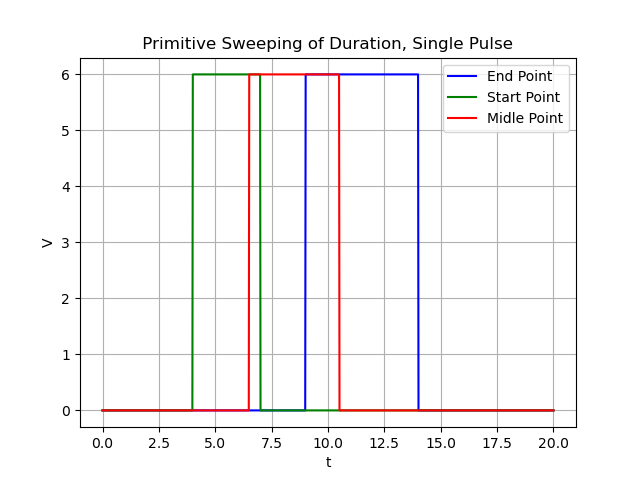

In [33]:
%matplotlib notebook
fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog,obo20,'-b',label='End Point')#blue  = end
plt.plot(trog,obo0,'-g',label='Start Point') #green = start
plt.plot(trog,obo10,'-r',label='Midle Point') #red = mittel
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.legend(loc=0)
ax.set_title(' Primitive Sweeping of Duration and time, Single Pulse ')
plt.show()

#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [34]:
PulsoH

{'Amplitude': 6,
 'Start time': 4,
 'End time': 9,
 'Start Duration': 3,
 'End Duration': 5,
 'Sweep time': 1,
 'Sweep Duration': 1}

## Time interval for plotting purposes and ploting Pulse Scheme sweeping

In [50]:
trog1 = np.linspace(-1e-10,50,1000); #this interval should correspond to the one given by the Sweep(PulList,N,n,t)
                                    #maybe I should also return that array directly from the function instead of
                                    #creating it appart

pobos0 = Sweep(Pulses_List2,100,0,50); #Starting point
pobos50 = Sweep(Pulses_List2,100,50,50); #Midle Point
pobos100 = Sweep(Pulses_List2,100,100,50); #End Point

<IPython.core.display.Javascript object>


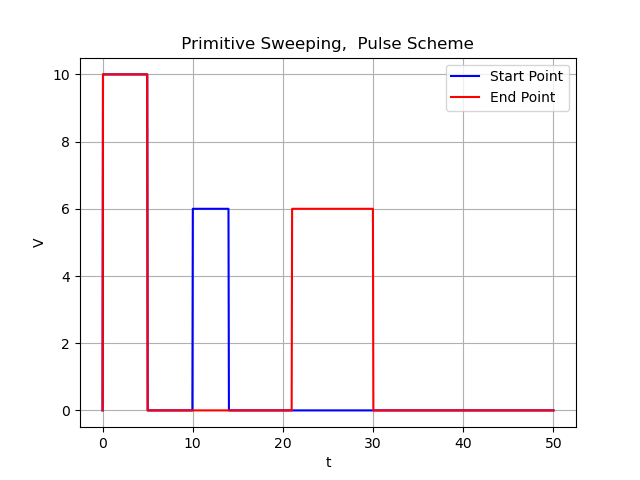

In [51]:
%matplotlib notebook
fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog1,pobos0,'-b',label='Start Point')#blue  = start
#plt.plot(trog1,pobos50,'-g',label='Midle Point') #green = mittel
plt.plot(trog1,pobos100,'-r',label='End Point') #red = end
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Primitive Sweeping,  Pulse Scheme ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [49]:
Pulses_List2

[{'Amplitude': 10,
  'Start time': 1e-10,
  'End time': 2e-10,
  'Start Duration': 5,
  'End Duration': 6,
  'Sweep time': 0,
  'Sweep Duration': 0},
 {'Amplitude': 6,
  'Start time': 10,
  'End time': 21,
  'Start Duration': 4,
  'End Duration': 9,
  'Sweep time': 1,
  'Sweep Duration': 1}]